# Grupo Bimbo Inventory Demand
[Link](https://www.kaggle.com/c/grupo-bimbo-inventory-demand)

## Describing "producto_tabla"

In [11]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/producto_tabla.csv'
product_table_rdd = (sc.textFile(path)
                     .map(lambda line: line.split(",")))

product_table_df = (product_table_rdd
                    .toDF(['product_id','product_name']))
#drop Header
product_table_df = (product_table_df
                    .filter(col('product_id') != 'Producto_ID'))

product_table_df.show(20, False)

+----------+----------------------------------------+
|product_id|product_name                            |
+----------+----------------------------------------+
|0         |NO IDENTIFICADO 0                       |
|9         |Capuccino Moka 750g NES 9               |
|41        |Bimbollos Ext sAjonjoli 6p 480g BIM 41  |
|53        |Burritos Sincro 170g CU LON 53          |
|72        |Div Tira Mini Doradita 4p 45g TR 72     |
|73        |Pan Multigrano Linaza 540g BIM 73       |
|98        |Tostado Integral 180g WON 98            |
|99        |Pan Blanco 567g WON 99                  |
|100       |Super Pan Bco Ajonjoli 680g SP WON 100  |
|106       |Wonder 100pct mediano 475g WON 106      |
|107       |Wonder 100pct gde 680g SP WON 107       |
|108       |Baguette Precocida Cong 280g DH 108     |
|109       |Pan Multicereal 475g WON 109            |
|112       |Tostado Integral 180g WON 112           |
|122       |Biscotel Receta Original 410g CU SUA 122|
|123       |Super Bollos 5in

## Count rows - producto_tabla

In [42]:
format(product_table_df.count(), ',d')

'2,592'

## Describing "cliente_tabla"

In [40]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/cliente_tabla.csv'
customer_table_rdd = (sc.textFile(path)
                      .map(lambda line: line.split(",")))

customer_table_df = (customer_table_rdd
                     .toDF(['customer_id','customer_name']))
#drop Header
customer_table_df = (customer_table_df
                     .filter(col('customer_id') != 'Cliente_ID'))

customer_table_df.show(20, False)

+-----------+---------------------------------------+
|customer_id|customer_name                          |
+-----------+---------------------------------------+
|0          |SIN NOMBRE                             |
|1          |OXXO XINANTECATL                       |
|2          |SIN NOMBRE                             |
|3          |EL MORENO                              |
|4          |SDN SER  DE ALIM  CUERPO SA CIA  DE INT|
|4          |SDN SER DE ALIM CUERPO SA CIA DE INT   |
|5          |LA VAQUITA                             |
|6          |LUPITA                                 |
|7          |I M EL GUERO                           |
|8          |MINI SUPER LOS LUPES                   |
|9          |SUPER KOMPRAS MICRO COLON              |
|10         |LONJA MERCANTIL DE TODO                |
|11         |FARMACIA NICOLAS SAN JUAN              |
|12         |PAPELERIA CATALA                       |
|13         |ELENA                                  |
|14         |CASA TRINO     

## Count rows - cliente_tabla

In [45]:
format(customer_table_df.count(), ',d')

'935,362'

## Describing "town_state"

In [70]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/home/jasam/Downloads/bimbo/town_state.csv'

# Clean data
town_state_table_rdd = (sc.textFile(path)
                        .map(lambda line: line.replace('MÉXICO,','MÉXICO')))

town_state_table_rdd = (town_state_table_rdd
                        .map(lambda line: line.split(",")))
town_state_table_df = (town_state_table_rdd
                       .toDF(['agency_id','town','state']))
#drop Header
town_state_table_df = (town_state_table_df
                       .filter(col('agency_id') != 'Agencia_ID'))

town_state_table_df.show(20, False)

+---------+-----------------------+----------------+
|agency_id|town                   |state           |
+---------+-----------------------+----------------+
|1110     |2008 AG. LAGO FILT     |"MÉXICO D.F."   |
|1111     |2002 AG. AZCAPOTZALCO  |"MÉXICO D.F."   |
|1112     |2004 AG. CUAUTITLAN    |ESTADO DE MÉXICO|
|1113     |2008 AG. LAGO FILT     |"MÉXICO D.F."   |
|1114     |2029 AG.IZTAPALAPA 2   |"MÉXICO D.F."   |
|1116     |2011 AG. SAN ANTONIO   |"MÉXICO D.F."   |
|1117     |2001 AG. ATIZAPAN      |ESTADO DE MÉXICO|
|1118     |2007 AG. LA VILLA      |"MÉXICO D.F."   |
|1119     |2013 AG. MEGA NAUCALPAN|ESTADO DE MÉXICO|
|1120     |2018 AG. TEPALCATES 2  |"MÉXICO D.F."   |
|1121     |2016 AG. SAN LORENZO   |"MÉXICO D.F."   |
|1122     |2019 AG. XALOSTOC      |ESTADO DE MÉXICO|
|1123     |2094 CHALCO_BM         |ESTADO DE MÉXICO|
|1124     |2021 AG. XOCHIMILCO 2  |"MÉXICO D.F."   |
|1126     |2017 AG. SANTA CLARA   |ESTADO DE MÉXICO|
|1127     |2003 AG. COACALCO      |ESTADO DE M

## Count rows - town_state

In [86]:
format(town_state_table_df.count(), ',d')

'790'

## Group by state - count  - town_state table

In [85]:
(town_state_table_df.groupBy('state')
                    .count()
                    .orderBy(col('count').desc())
                    .show(20))

+--------------------+-----+
|               state|count|
+--------------------+-----+
|    ESTADO DE MÉXICO|   71|
|       "MÉXICO D.F."|   65|
|             JALISCO|   55|
|            VERACRUZ|   45|
|          GUANAJUATO|   39|
|              SONORA|   34|
|          NUEVO LEÓN|   34|
|              PUEBLA|   34|
|           MICHOACÁN|   33|
|          TAMAULIPAS|   32|
|BAJA CALIFORNIA N...|   32|
|            COAHUILA|   29|
|           CHIHUAHUA|   25|
|             SINALOA|   23|
|              OAXACA|   22|
|            GUERRERO|   21|
|             HIDALGO|   21|
| BAJA CALIFORNIA SUR|   17|
|             CHIAPAS|   16|
|     SAN LUIS POTOSÍ|   15|
+--------------------+-----+
only showing top 20 rows



## Describing "train data"

In [14]:
# Load producto_tabla data
from pyspark.sql.types import StringType
from pyspark.sql.functions import col

path = '/data/train.csv'
train_table_rdd = (sc.textFile(path)
                   .map(lambda line: line.split(",")))
columns = ['week','agency_id','channel','route_sak','customer_id',
           'product_id','sale_uni_today','sale_today','dev_uni_prox',
           'dev_prox','demand_uni_equil']
train_table_df = (train_table_rdd
                  .toDF(columns))

#drop Header
train_table_df = (train_table_df
                  .filter(col('week') != 'Semana'))

train_table_df.show(10, False)

+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|week|agency_id|channel|route_sak|customer_id|product_id|sale_uni_today|sale_today|dev_uni_prox|dev_prox|demand_uni_equil|
+----+---------+-------+---------+-----------+----------+--------------+----------+------------+--------+----------------+
|3   |1110     |7      |3301     |15766      |1212      |3             |25.14     |0           |0.0     |3               |
|3   |1110     |7      |3301     |15766      |1216      |4             |33.52     |0           |0.0     |4               |
|3   |1110     |7      |3301     |15766      |1238      |4             |39.32     |0           |0.0     |4               |
|3   |1110     |7      |3301     |15766      |1240      |4             |33.52     |0           |0.0     |4               |
|3   |1110     |7      |3301     |15766      |1242      |3             |22.92     |0           |0.0     |3               |
|3   |1110     |

## Schema train data

In [5]:
train_table_df.printSchema()

root
 |-- week: string (nullable = true)
 |-- agency_id: string (nullable = true)
 |-- channel: string (nullable = true)
 |-- route_sak: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- sale_uni_today: string (nullable = true)
 |-- sale_today: string (nullable = true)
 |-- dev_uni_prox: string (nullable = true)
 |-- dev_prox: string (nullable = true)
 |-- demand_uni_equil: string (nullable = true)



## Count rows - train_table

In [2]:
format(train_table_df.count(), ',d')

'74,180,464'

## Descriptive Statistics - train_table

In [3]:
train_table_df.describe('sale_uni_today', 'sale_today', 'dev_uni_prox', 'dev_prox', 'demand_uni_equil').show()

+-------+------------------+-----------------+------------------+------------------+------------------+
|summary|    sale_uni_today|       sale_today|      dev_uni_prox|          dev_prox|  demand_uni_equil|
+-------+------------------+-----------------+------------------+------------------+------------------+
|  count|          74180464|         74180464|          74180464|          74180464|          74180464|
|   mean| 7.310163468376256|68.54452258608424|0.1302576646056029|1.2432480515354734|7.2245640038056385|
| stddev|21.967336840002165|338.9795158521776|29.323204167613063|39.215522581495215| 21.77119294903071|
|    min|                 0|              0.0|                 0|               0.0|                 0|
|    max|               999|           9999.2|                99|            999.92|               999|
+-------+------------------+-----------------+------------------+------------------+------------------+



## Descriptive Statistics - "correlation" between unitary sales  and sales

In [4]:
train_table_df_cor = (train_table_df.select(train_table_df.sale_uni_today.cast('float'), 
                                            train_table_df.sale_today.cast('float')))
train_table_df_cor.stat.corr('sale_uni_today', 'sale_today')

0.7336777290062535

## Descriptive Statistics - "correlation" between dev_uni_prox  and dev_prox

In [13]:
train_table_df_cor = (train_table_df.select(train_table_df.dev_uni_prox.cast('float'), 
                                            train_table_df.dev_prox.cast('float')))
train_table_df_cor.stat.corr('dev_uni_prox', 'dev_prox')

0.1294211664137144

## Bar plot - count by product type

In [24]:
product_grouped_df = (train_table_df.join(product_table_df, 'product_id')
                                    .select(product_table_df.product_name))
product_grouped_pandas = product_grouped_df.groupBy('product_name').count().toPandas()
product_grouped_pandas = product_grouped_pandas.sort_values(by='count', ascending=0)

In [20]:
%matplotlib inline
import seaborn as sns

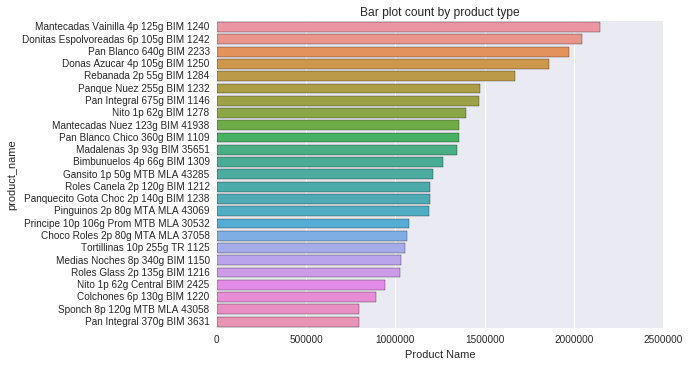

In [23]:
sns.plt.title('Bar plot count by product type')
plot = sns.barplot(x='count', y='product_name', data=product_grouped_pandas.head(25))
plot.set(xlabel='Product Name')

## Bar plot sale unitary today

In [25]:
sale_uni_grouped_pandas = train_table_df.groupBy('sale_uni_today').count().toPandas()
sale_uni_grouped_pandas = sale_uni_grouped_pandas.sort_values(by='count', ascending=0)

In [41]:
sale_uni_grouped_pandas.head(10)

,sale_uni_today,count
519,2,15299482
511,1,13496679
528,3,9271143
538,4,7260737
547,5,5707842
558,6,4272687
999,10,2929543
576,8,2423855
567,7,1762233
585,9,1191273


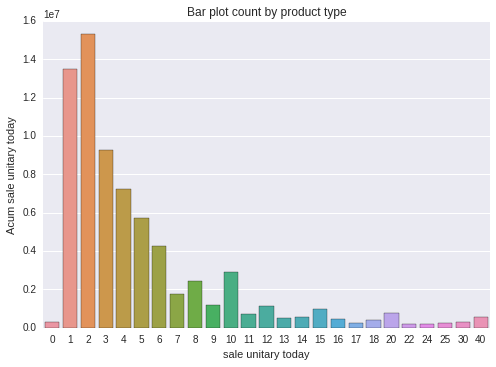

In [40]:
sale_uni_grouped_pandas[['sale_uni_today']] = sale_uni_grouped_pandas[['sale_uni_today']].astype(int)
sale_uni_grouped_pandas = sale_uni_grouped_pandas.sort_values(by='count', ascending=0)
sns.plt.title('Bar plot count by product type')
plot = sns.barplot(x='sale_uni_today', y='count', data=sale_uni_grouped_pandas.head(25))
plot.set(xlabel='sale unitary today')
plot.set(ylabel='Acum sale unitary today')

## Sale unity today for "Mantecadas Vainilla 4p 125g BIM 1240" distribution

In [60]:
product_grouped_pandas = (train_table_df.join(product_table_df, 'product_id')
                                        .select(product_table_df.product_name, train_table_df.sale_uni_today)
                                        .filter(product_table_df.product_name == 'Mantecadas Vainilla 4p 125g BIM 1240')
                                        .toPandas())

/home/jasam/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


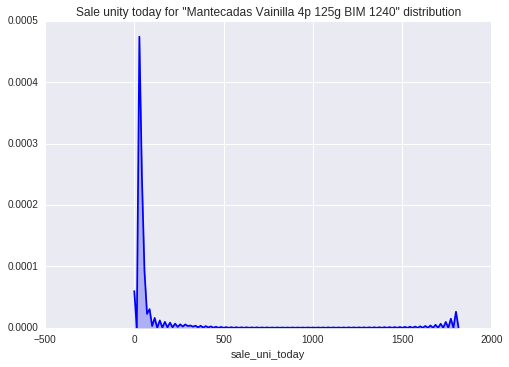

In [66]:
#product_grouped_pandas
product_grouped_pandas.loc[:,('sale_uni_today')] = product_grouped_pandas.sale_uni_today.astype(int)
sns.plt.title('Sale unity today for "Mantecadas Vainilla 4p 125g BIM 1240" distribution')
sns.distplot(product_grouped_pandas.sale_uni_today, hist=False, color="b", kde_kws={"shade": True})